# <font color="darkblue"> Método Linear Imprópio</font>

Em 1974, o psicologo Robym Dawes propôs o *metodo linear imprópio*, em vez de usar a regressão multipla (linear) para determinar o peso preciso de cada variável preditora, ele propôs atribuir pesos iguais a todas elas.

**Correlação de validação cruzada:** para um modelo de classificação ser bem-sucedido sua medida de precisão deve ser eficaz em uma nova amostra (teste), diferente da amostra original (treino) onde os pesos foram induzidos.

Dawes propôs a previsão da média escolar de 90 alunos do primeiro ano da pós-graduação em Psicologia na Universidade de Ilinois. Foram utilizadas 10 variáveis ligadas a sucesso acadêmico: notas, extroversão, integridade, pontos em teste de apitidão e etc.
O modelo de regressão linear multipla obteve $E_{in}=25\%$ (treino) e $E_{out}=31\%$ (teste). Já o *modelo linear imprópio* obteve $E_{in}$ e $E_{out}$ praticamente iguais com valor de 30%, pela correlação de validação cruzada melhor que a regressão linear múltipla. Isto ocorreu em vários outros estudos realizados por Dawes. O que está acontecendo nestes casos??

**Condições para o método linear imprópio ser melhor que a regressão linear:**


1.   Usar variáveis preditoras correlacionadas de forma confiável com o resultado;  

2.   As variáveis preditoras tem que está normalizadas;

3.   Amostra original pequena. A precisão na validação cruzada diminui por causa do peso dos acasos (ruídos) que fica maior em amostras pequenas. Nas ciências sociais as amostras são geralmente pequenas.



**Objetivos:**

*   Comparar o resultado do modelo proposto por Robym Dawes com a regressão logística em um dataset de classificação de risco de ataque cardíaco;
*   Identificar como resolver o problema nos erros de classificação de modelos de aprendizado.

**Requisitos de execução:**


*   Upload do arquivo *heart_failure_clinical_records_dataset.csv*

**Atividade 1:**

1. Carregar os dados do arquivo *heart_failure_clinical_records_dataset.csv* utilizando o pandas.

    

In [ ]:
import pandas as pd
import numpy as np

heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(heart_data.head())


**Atividade 2:**

1. Plotar o quadro de correlações entre as variáveis preditoras e o rótulo a ser aprendido.

<Axes: >

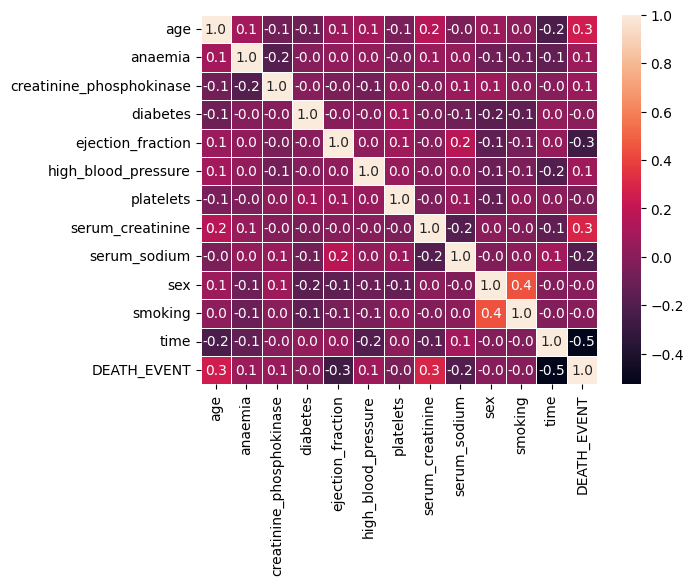

In [2]:
import seaborn as sn

correlation = heart_data.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

**Atividade 3:**

1. Extrair do *Dataframe* as variáveis preditoras com correlação baixa ao rótulo;
2. Construir a matriz de amostras *X* e o vetor de rótulos *y* (["DEATH_EVENT"]);
3. Pegar 50% dos dados aleatoriamente para criar uma amostra pequena;
4. Dividir os dados em treino (80%) e teste (20%);
5. Normalizar os dados. As amostras de teste devem ser normalizadas separadas dos dados de treino com os valores min/max obtidos nos dados do treino. Evita bisbilhotagem dos dados.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

x = heart_data[Features].values
y = heart_data["DEATH_EVENT"].values
y = [+1 if y_ == 1 else -1 for y_ in y]

x, _, y, _ = train_test_split(x,y, test_size=0.5, random_state=38)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

mms = MinMaxScaler()
mms.fit(x_train)
x_test = mms.transform(x_test)
x_train = mms.transform(x_train)

print("Tamanho treinamento: " + str(len(x_train)))
print("Tamanho teste: " + str(len(x_test)))

#print(x_test)

**Atividade 4:**

1. Utilizar a classe LogisticRegression do pacote *sklearn.metrics* para induzir os pesos associado a cada variável preditora. Utilize para isto os dados de treino;
2. Compute e compare os valores de $E_{in}$ e $E_{out}$ (validação cruzada);
3. Compute o relatório de classificação com os dados de teste.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

print("Ein: " + str(1 - accuracy_score(y_train, model.predict(x_train))))
print("Eout: " + str(1 - accuracy_score(y_test, model.predict(x_test))))
print(classification_report(y_test, model.predict(x_test)))

Sentença final do artigo seminal de Dawes:

**"O segredo reside em decidir quais variáveis observar e depois saber como somar".**

**Atividade 5:**

1. Implemente o classificador do modelo linear improprio. Todos os pesos de cada variável preditora são igual em módulo a 1, entretanto, toda variável com correlação negativa ao resutlado deve ter peso -1. Adicione o peso do bias igual a +1;
2. Compute e compare os valores de $E_{in}$ e $E_{out}$ (correlação de validação cruzada);
3. Computar o valor de acurácia dos dados de teste e comparar com o classificador das Atividades 4.

In [ ]:
class LinearInappropriateRegression:
  def fit(self, X, y):
    self.w = np.array([+1, +1, -1, +1, -1, -1])

  def predict(self, X):
    return [1 if (self.w[0] + self.w[1:].T @ x) >= 0
            else -1 for x in X]


model = LinearInappropriateRegression()
model.fit(x_train, y_train)

print("Ein: " + str(1 - accuracy_score(y_train, model.predict(x_train))))
print("Eout: " + str(1 - accuracy_score(y_test, model.predict(x_test))))
print(classification_report(y_test, model.predict(x_test)))

**Atividade 6:**

1. Realizar o processo de validação do parâmetro *C* da penalidade $l_2$ (regularização *weight decay*) usando a classe *GridSearchCV* do pacote *sklearn.model_selection*;
2. Compute e compare os valores de $E_{in}$ e $E_{out}$ (validação cruzada);
3. Computar o valor de acurácia dos dados de teste e comparar com o classificador das Atividades 4.

Parâmetros:


*   *estimator* : instância do classificador cujos hiperparâmetros serão analisados;
*   *cv* : número de divisões do conjunto de treinamento para ser usado na técnica de validação cruzada (10 é um bom valor observado na prática);
*   *param_grid* : conjunto de parâmetros a serem combinados durante a fase de validação.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":np.logspace(0, 30,100)}
model = LogisticRegression(penalty='l2')

clf = GridSearchCV(model, param_grid, cv=10)
clf.fit(x_train, y_train)

print("Ein: " + str(1 - accuracy_score(y_train, clf.predict(x_train))))
print("Eout: " + str(1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))